In [65]:
import TurbPy as tb
from TurbPy.imports import *

In [66]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
deck = 'KH_800ppc/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [67]:
from TurbPy.load_vars import *

jrms_t = np.array([])
drhoe_t = np.array([])
drhoi_t = np.array([])
drho_t = np.array([])
db_t = np.array([])
ome_t = np.array([])
omi_t = np.array([])
for t in np.arange(len(times)):
  dse = tb.load_vars(dirs, times[t], species = 'electron')
  dsi = tb.load_vars(dirs, times[t], species = 'ion')
  jx = (dse['jx'] + dsi['jx'])
  jy = (dse['jy'] + dsi['jy'])
  jz = (dse['jz'] + dsi['jz'])
  jrms_t = np.append(jrms_t, np.sqrt(np.average(jx**2 + jy**2 + jz**2)))
  drhoe_t = np.append(drhoe_t, np.sqrt(np.average((dse['rho'])**2)))
  drhoi_t = np.append(drhoi_t, np.sqrt(np.average((dsi['rho'])**2)))
  db_t = np.append(db_t, 
                    np.sqrt(np.average((dse['cbx'])**2)+
                    np.average((dse['cby'])**2) +
                    np.average((dse['cbz'])**2)))
  ome = tb.pcurl(dse['jx']/dse['rho'],
                dse['jy']/dse['rho'], 
                dse['jz']/dse['rho'], 
                dx = info['dx/de'], 
                dy = info['dy/de'], 
                dz = info['dz/de'])
  omi = tb.pcurl(dsi['jx']/dsi['rho'],
                dsi['jy']/dsi['rho'], 
                dse['jz']/dsi['rho'], 
                dx = info['dx/de'], 
                dy = info['dy/de'], 
                dz = info['dz/de'])
  ome_t = np.append(ome_t, np.average(ome[0]**2 + ome[1]**2 + ome[2]**2))
  omi_t = np.append(omi_t, np.average(omi[0]**2 + omi[1]**2 + omi[2]**2))

In [68]:
df = pd.DataFrame({'jrms': jrms_t, 
                   'drhoi': drhoi_t,
                   'drhoe': drhoe_t,
                   'db': db_t,
                   'ome': ome_t,
                   'omi': omi_t})

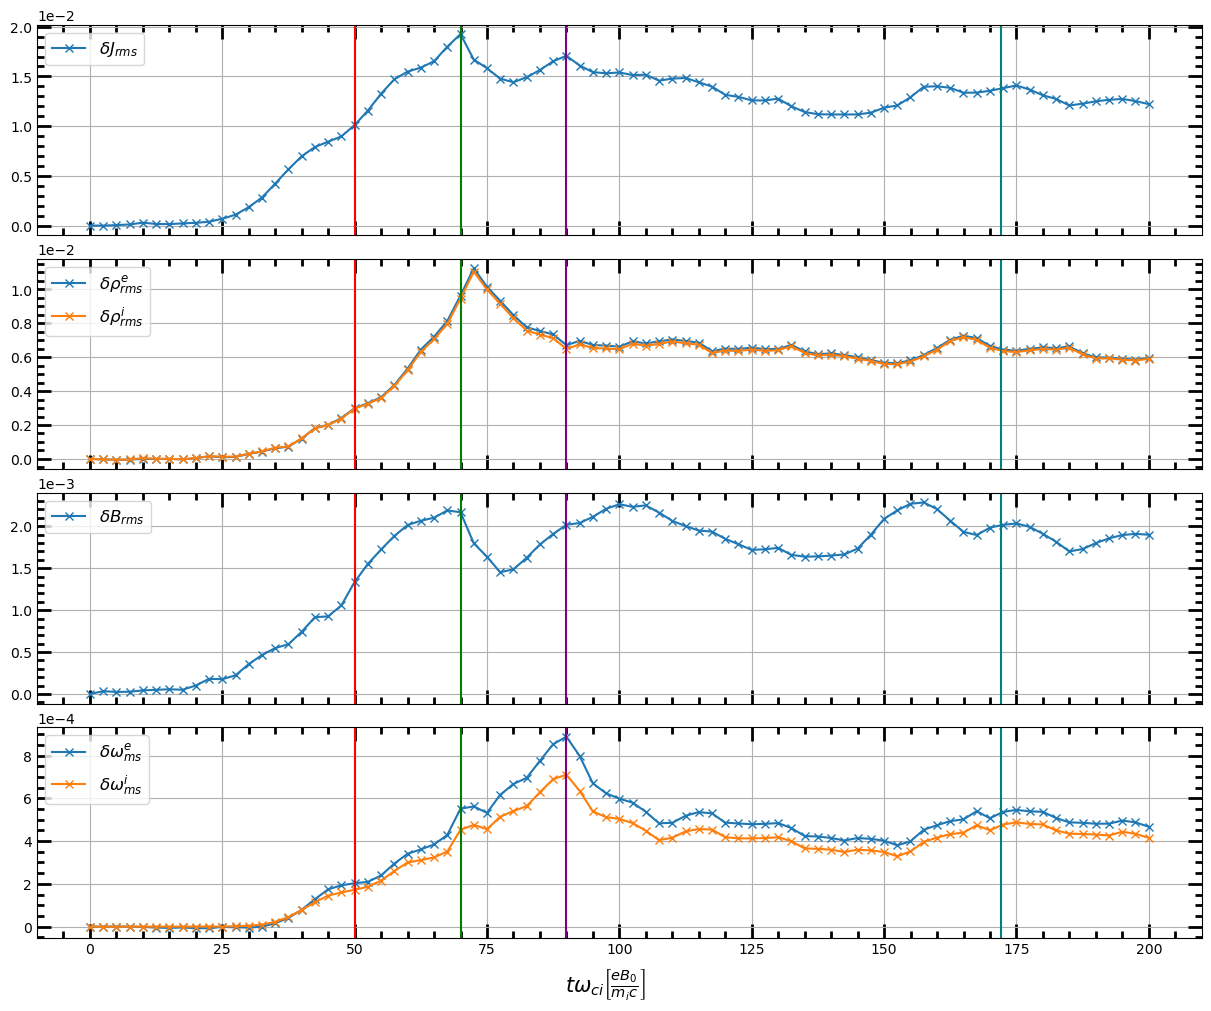

In [69]:
fig, axs = plt.subplots(4,1, figsize=(12, 10), sharex = True, layout='constrained')
axs[0].plot(twci, (jrms_t - jrms_t[0]  ), marker = 'x',  label = r'$\delta J_{rms}$')
axs[1].plot(twci, (drhoe_t - drhoe_t[0]), marker = 'x',  label = r'$\delta \rho^e_{rms}$')
axs[1].plot(twci, (drhoi_t - drhoi_t[0]), marker = 'x',  label = r'$\delta \rho^i_{rms}$')
# axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
axs[2].plot(twci, db_t - db_t[0]  , marker = 'x', label = r'$\delta B_{rms}$')
axs[3].plot(twci, ome_t - ome_t[0], marker = 'x', label = r'$\delta \omega^e_{ms}$')
axs[3].plot(twci, omi_t - omi_t[0], marker = 'x', label = r'$\delta \omega^i_{ms}$')


for ax in axs:
  ax.axvline(50, color = 'red')
  ax.axvline(70, color = 'green')
  ax.axvline(90, color = 'purple')
  ax.axvline(172, color = 'teal')
  ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
  ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
  ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
  ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
  ax.legend(loc = 'upper left', fontsize = 12)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  ax.tick_params(which='both', width=2, labelsize = 10, right = True, direction = 'in')
  ax.tick_params(which='major', length=10, top = True, right =True)
  ax.tick_params(which='minor', length=5 , top = True, right =True)
  ax.grid()

# fig.supylabel(, size = 15)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 15)
plt.savefig(figs + 'globals.jpg', dpi = 400)